# <span style="color:darkblue"> Nationality and Success </span>

<font size="5"> 
<span style="color:gray">Exploring the Relationship Between Drivers' Nationalities/Continent of Origin and Performance in Formula 1 Competitions </span>


<font size="3"> Group 26:
Miracle Ephraim, Jeremy Hannon, Martinez Jean Claude, Ashlyn Winters

In [1]:
#Import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<font size="5"> 

<span style="color:darkblue"> Introduction </span>

<font size="3">

In our study, we will be examining whether there is a relationship between drivers’ nationality and continent of origin and their racing performance to ultimately conclude which nation and continent produces the best drivers in Formula 1 (F1) races. Formula 1 is a high-class international racing operation established in 1950, where drivers from around the world compete in a series of international races (known as Grands Prix) to earn points for themselves and their team (1). In order to explore our research question, we will be using a Formula 1 dataset containing information on factors such as drivers, teams, races, and results from the years 1950-2023. The question we pose is significant as we aim to better understand what factors may influence a driver's wins. If drivers' nationality and/or continent of origin seem to be correlated with better performance, it may imply there are specific characteristics in those nations and continents that influence their drivers' success. This may additionally provide other teams information that could improve their standings as they look towards these nations to explore their strengths to determine how they can improve their own performance.

To conduct our analysis, we combined two tables in the F1 dataset to explore both drivers and their results. After cleaning the data, we found the average rank, position, points earned, and record lap time for each nationality and continent of origin of drivers. We plotted all averages on bar graphs and additionally found the top 5 nationalities with either the best average rank, position, points earned, or record lap time. In conclusion, we found that Australian, Austrian, British, Canadian, Colombian, Dutch, Danish, Finnish, Mexican, Monegasque, New Zealander, Spanish, and Thai drivers on average had the strongest performance, as these nationalities all made the top five in at least one of these tables. Additionally, we found that drivers from the continent of Australia and New Zealand demonstrate the best performance considering all variables studied. Thus, we conclude that the drivers of nationalities demonstrating strong performance in multiple measures of performance—Monegasque, Australian, Colombian, Finnish, and Spanish— should be studied to elucidate the factors that influence their success, but a particular focus should be placed on Australian and New Zealander drivers due to their strong performance compared to drivers from other continents. 

<font size="5"> 

<span style="color:darkblue"> Dataset </span>

<font size="3"> Analysis of 2 tables in the F1 dataset— drivers and results tables— allow us to explore the potential connection between area of origin and performance in races. The drivers dataset contains useful information about the drivers such as their names, nationality, driver ID, date of birth, etc. In this dataset, each row represents 1 unique racer to make for a total of 857 drivers in the F1 races. The results dataset indicates the driver ID, position, lap number, lap times, and many other variables that are direct measures of a driver's performance and allow us to make comparisons between drivers. This dataset contains 25840 rows showcasing a certain driver's performance in a race. Both of these tables contain data from the years 1950-2022, and we can explore our research question using <span style="color:maroon">"driverId"</span> to connect these two datasets. 

In [2]:
#Import datasets
drivers = pd.read_csv("data_raw/drivers.csv")
results = pd.read_csv("data_raw/results.csv")

In [3]:
## Drivers dataset
# Number of rows

len(drivers["driverId"])

# Each row is a driver. There are 857 observations which
# indicate that there are 857 drivers participating in the race,
# each with their own specific driverId.


857

In [4]:
# Variables present
drivers.columns.values

# There are 9 variables within the drivers dataset  driverId', 'driverRef',
# 'number', 'code', 'forename', 'surname', 'dob', 'nationality', 'url'

array(['driverId', 'driverRef', 'number', 'code', 'forename', 'surname',
       'dob', 'nationality', 'url'], dtype=object)

In [5]:
## Drivers standings
# Number of rows

len(results)

# The number of rows is 25840 which indicates that the number of results from
# the races which can be based on driver Id

25840

In [6]:
# Variables

results.columns.values

# These are the variables that are present in the dataset for results.
# These are the variables that are present in the dataset for results:
# resultId', 'raceId', 'driverId', 'constructorId', 'number',
# 'grid', 'position', 'positionText', 'positionOrder', 'points',
# 'laps', 'time', 'milliseconds', 'fastestLap', 'rank',
# 'fastestLapTime', 'fastestLapSpeed', 'statusId'.

array(['resultId', 'raceId', 'driverId', 'constructorId', 'number',
       'grid', 'position', 'positionText', 'positionOrder', 'points',
       'laps', 'time', 'milliseconds', 'fastestLap', 'rank',
       'fastestLapTime', 'fastestLapSpeed', 'statusId'], dtype=object)

<font size="5"> 

<span style="color:darkblue"> Merging </span>

<font size="3">To conduct our research, we merged the columns <span style="color:maroon">"rank" ,"points", "position", "driverId",</span> and <span style="color:maroon">"fastestLapTime"</span> from the results dataset with the columns <span style="color:maroon">"driverId," "driverRef,"</span> and <span style="color:maroon">"nationality"</span> from the drivers dataset to create drivers_merged. We chose <span style="color:maroon">"driverRef"</span> to include in this merged dataset along with our explanatory variable <span style="color:maroon">"nationality"</span> and the merging variable <span style="color:maroon">"driverId"</span> to allow for easy viewing of the merged dataset. We chose <span style="color:maroon">"rank", "points","position",</span> and <span style="color:maroon">"fastestLapTime"</span> to analyze because these variables all are measures of a driver's performance, and analysis of multiple variables allows us to better control for variations in different races. We also perform three more merges during our data cleaning and restructuring. In the second merge, we first calculated the record lap time for each driver in a new aggregate data table (record_time) and merged columns <span style="color:maroon">"driverId"</span> as our connecting variable and <span style="color:maroon">"nationality"</span> from the drivers dataset. In the third merge, we used the connecting variable <span style="color:maroon">"nationality"</span> to merge the aggregated dataset containing the average rank, position, and points of each nationality (nat_avg) with the average record lap time of each nationality (nationality_lap) to create drivers_fastest. Finally, in our fourth merge, we used the connecting variable <span style="color:maroon">"continent"</span> created from our function fn_continent to merge the average rank, position, and points of each continent with the average record lap time of each continent to create continent_agg.

<font size="4"> 

<span style="color:Green"> Merge 1 </span>

In [7]:
#Merge the drivers and results datasets
drivers_merged = pd.merge(drivers [["driverId", "driverRef", "nationality"]],
                       results[["rank", "points", "position", "driverId", "fastestLapTime"]],
                       on = "driverId",
                       how = "left")


<font size="5"> 

<span style="color:darkblue"> Data Cleaning </span>

<font size="3"> First, we converted <span style="color:maroon">"rank", "points",</span> and <span style="color:maroon">"position"</span> to a numeric variable and removed the missing values. Since we want to analyze the fastest lap time overall for each driver, we also converted this time from a string variable into a numeric variable, creating a function (fn_na) to both identify missing values and calculate the time in milliseconds so we can add a new column (fl_ms). After finding the record time for each driver and merging nationality (as described in the section above), we found the average rank, points, position, and record time for each nationality. To ensure we could use all variables in our analysis, we removed nationalities that were missing one or more of each averaged variable due to lack of information. Then, we created a function that assigned each nationality to a continent (fn_continent) and repeated the above steps using continent instead of nationality to find the average rank, points, position, and record time by continent. We also removed one continent (Africa) from our analysis since there was no information about its drivers' mean rank and mean record.


In [8]:
##Convert value to integer
#Find columns in dataset
drivers_merged.columns.values
#Create list with relevant column names
column_names= drivers_merged.iloc[:,3:6].columns.values

#Convert value to integer
for column in column_names:
    drivers_merged[column]=drivers_merged[column].replace("\\N", np.nan)
    drivers_merged[column] = pd.to_numeric(drivers_merged[column])

In [9]:
#Find which values to remove for Time

#ensure all values are a string so we can identify missing values
drivers_merged['fastestLapTime'] = drivers_merged['fastestLapTime'].astype(str)

def fn_na(string):
    if len(string)!=8:
        return(string)
        
not_time=drivers_merged["fastestLapTime"].apply(fn_na)
print(pd.unique(not_time))

[None '\\N' 'nan']


In [10]:
#Convert Time to milliseconds for analysis
drivers_merged['fastestLapTime'] = drivers_merged['fastestLapTime'].astype(str)

def fn_milliseconds(time): 
    if time== "\\N" or time== "nan": #remove all missing values
        return np.nan
    else: 
        minutes, seconds= time.split(':')
        seconds, milliseconds = seconds.split('.')
        totalmilliseconds= int(minutes)*(60*1000)+(int(seconds)*1000)+int(milliseconds)
        return totalmilliseconds 
    
drivers_merged["fl_ms"]= drivers_merged["fastestLapTime"].apply(fn_milliseconds)

<font size="4"> 

<span style="color:Green"> Merge 2 </span>

In [11]:
#Find the record lap time for each driver
record_time=(drivers_merged.groupby("driverId")
            .agg(record_time_ms = ('fl_ms','min')))

#Merge to add nationality to each record time
record_nationality = pd.merge(record_time,
                       drivers[["driverId", "nationality"]],
                       on = "driverId",
                       how = "left")


<font size="4"> 

<span style="color:Purple"> Column Descriptions and Statistics </span>

Our data analysis involves 4 variables all originally obtained from the results dataset, along with the explanatory variables nationality and continent that signify where a driver is from. The first three columns (<span style="color:maroon">'rank' ,'points', 'position'</span>) come from our drivers_merged dataset, and our fourth column <span style="color:maroon">‘record_time_ms’</span> was originally obtained from <span style="color:maroon">‘fastestlaptime’</span>, but we converted the variable to milliseconds and only considered the fastest lap time of each driver overall, not the fastest lap time for each driver's race (which is what <span style="color:maroon">‘fastestlaptime’</span> represents ). The column <span style="color:maroon">'rank'</span> represents how the driver's fastest lap compares against that of their competitors, with a lower rank signifying a better relative time. The column <span style="color:maroon">'points'</span> represents the number of points a driver earns in a race, which is often considered to be the most important because it is the metric winners of specific races are based on. The column <span style="color:maroon">'position'</span> represents the position the driver finishes in, with a lower position representing a better performance relative to the other drivers. The column <span style="color:maroon">'record_time'</span> represents the fastest lap time a driver has out of all their races.

In [12]:
#Create Descriptive Statistics
descriptive_stat=drivers_merged[["rank", "points", "position"]].describe()
record_stat=record_time.describe()

display(pd.concat([descriptive_stat, record_stat], axis=1).round(2))

,rank,points,position,record_time_ms
count,7591.00,25840.00,14989.00,101.00
mean,10.41,1.88,7.94,70858.96
std,6.16,4.17,4.81,8411.32
min,0.00,0.00,1.00,55404.00
25%,5.00,0.00,4.00,68422.00
50%,10.00,0.00,7.00,72140.00
75%,16.00,2.00,11.00,74563.00
max,24.00,50.00,33.00,102783.00


<font size="5"> 

<span style="color:darkblue"> Cleaning Continued </span>

<font size="3"> 

In [13]:
#Find the average rank, points, and position for each nationality
nat_avg = (drivers_merged.groupby("nationality")
            .agg(mean_rank = ('rank','mean'),
                mean_points = ('points','mean'),
                 mean_position = ('position','mean'))
                 .reset_index()
                 )

In [14]:
#Find the mean record lap time for each nationality
nationality_lap= (record_nationality.groupby("nationality")
                    .agg(mean_record = ("record_time_ms",'mean'))
                    .reset_index())

<font size="4"> 

<span style="color:Green"> Merge 3 </span>

In [15]:
#Add mean record by nationality
drivers_fastest = pd.merge(nat_avg,
                       nationality_lap,
                       on = "nationality",
                       how = "left")

In [16]:
#Drop all Na values
drivers_fastest_clean = drivers_fastest.dropna()

#this is the cleaned dataset for nationality to be used in our analysis

In [17]:
##Start continent analysis
#Create lists of each nationality by continent

#Find all nationalities in dataset
drivers_merged["nationality"].unique()

#Assign nationalities to continent
North_American=['American', 'Canadian']
European=['Spanish','German', 'British', 'Austrian', 'Belgian', 'Polish', 'Czech', 'Danish', 'Dutch', 'East German', 'Finnish', \
      'French', 'Hungarian', 'Italian', 'Irish', 'Liechtensteiner', 'Monegasque', 'Russian', 'Swedish', 'Swiss']
Australian_or_NZ= ['Australian', 'New Zealander']
South_American= ['Argentine', 'Brazilian', 'Chilean', 'Colombian', 'Mexican', 'Portuguese', 'Uruguayan', 'Venezuelan' ]
African= ['South African', 'Rhodesian']
Asian= ['Chinese','Malaysian','Indonesian', 'Indian', 'Japanese', 'Thai']

def fn_continent(nationality):
    if nationality in North_American:
        return ("North American")
    elif nationality in South_American:
        return("South American")
    elif nationality in European:
        return("European")
    elif nationality in Australian_or_NZ:
        return("Australian or NZ")
    elif nationality in Asian:
        return("Asian")
    elif nationality in African:
        return ("African")

#Add continent to dataset
drivers_merged["continent"]= drivers_merged["nationality"].apply(fn_continent)

In [18]:
#Find the average rank, points, and position by continent
cont_avg = (drivers_merged.groupby("continent")
            .agg(mean_rank = ('rank','mean'),
                mean_points = ('points','mean'),
                 mean_position = ('position','mean'))
                 .reset_index()
                 )


In [19]:
#Find the record time by continent
record_nationality["continent"]= record_nationality["nationality"].apply(fn_continent)

continent_lap= (record_nationality.groupby("continent")
                    .agg(mean_record_ms = ("record_time_ms",'mean'))
                    .reset_index())

<font size="4"> 

<span style="color:Green"> Merge 4 </span>

In [20]:
#Add mean record by continent
continent_agg = pd.merge(cont_avg,
                       continent_lap,
                       on = "continent",
                       how = "left")

continent_agg= continent_agg.dropna()

#This is the cleaned dataset for continent that will be used in our analysis

<font size="5"> 

<span style="color:darkblue"> Results </span>

<font size="3"> 
 

<font size="4"> 
<span style="color:green"> Results by Nationality </span>



In [21]:
drivers_fastest_clean[["nationality","mean_rank"]].sort_values(by="mean_rank", ascending=True).iloc[:5].round(2)

,nationality,mean_rank
12,Colombian,6.02
29,Monegasque,7.32
17,Finnish,8.01
4,Australian,8.86
36,Spanish,8.94


From this table, we can see that drivers from Colombian, Monegasque, Finnish, Australian, and Spanish nationalities tend to have the best ranking.

In [22]:
drivers_fastest_clean[["nationality","mean_points"]].sort_values(by="mean_points", ascending=False).iloc[:5].round(2)

,nationality,mean_points
29,Monegasque,6.48
15,Dutch,4.19
17,Finnish,3.82
36,Spanish,3.54
4,Australian,3.45


From this table, we can see that drivers from Monegasque, Dutch, Finnish, Spanish, and Australian nationalities tend to have the most points earned, with drivers from Monegasque having a mean points earned value almost twice that of Australian drivers. 

In [23]:
drivers_fastest_clean[["nationality","mean_position"]].sort_values(by="mean_position", ascending=True).iloc[:5].round(2)

,nationality,mean_position
12,Colombian,4.81
30,New Zealander,6.25
29,Monegasque,6.31
5,Austrian,6.60
8,British,6.82


From this table, we can see that drivers from Colombian, New Zealander, Monegasque, Austrian, and British nationalities tend to have the best position.

In [24]:
drivers_fastest_clean[["nationality","mean_record"]].sort_values(by="mean_record", ascending=True).iloc[:5].round(2)

,nationality,mean_record
39,Thai,57056.00
14,Danish,57516.00
9,Canadian,62601.33
17,Finnish,62645.33
28,Mexican,63241.50


From this table, we can see that drivers from Thai, Danish, Canadian, Finnish, and Mexican nationalities tend to have the fastest overall lap record. 

<function matplotlib.pyplot.show(close=None, block=None)>

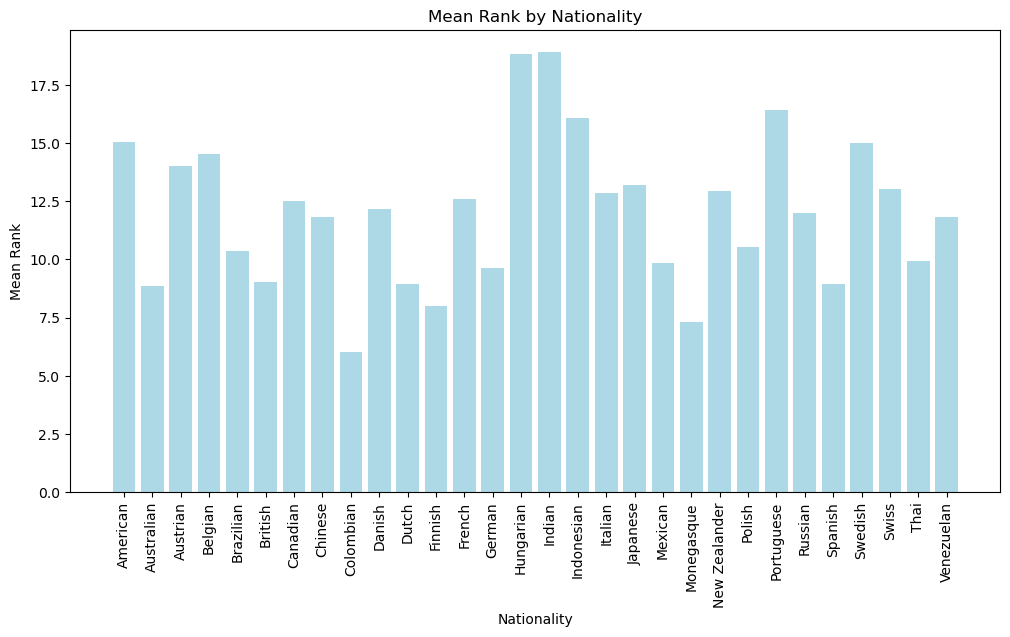

In [25]:
#Bar graph for mean rank
plt.figure (figsize= (12,6))

plt.bar(x = drivers_fastest_clean["nationality"],height = drivers_fastest_clean["mean_rank"], color="lightblue")
plt.xlabel("Nationality")
plt.ylabel("Mean Rank")
plt.title("Mean Rank by Nationality")
plt.xticks(rotation=90)
plt.show

From this graph, we can see the average mean ranks for each nationality studied. We also see that the range of mean rank is from around 6 (Colombian) to around 18 (Indian). 

<function matplotlib.pyplot.show(close=None, block=None)>

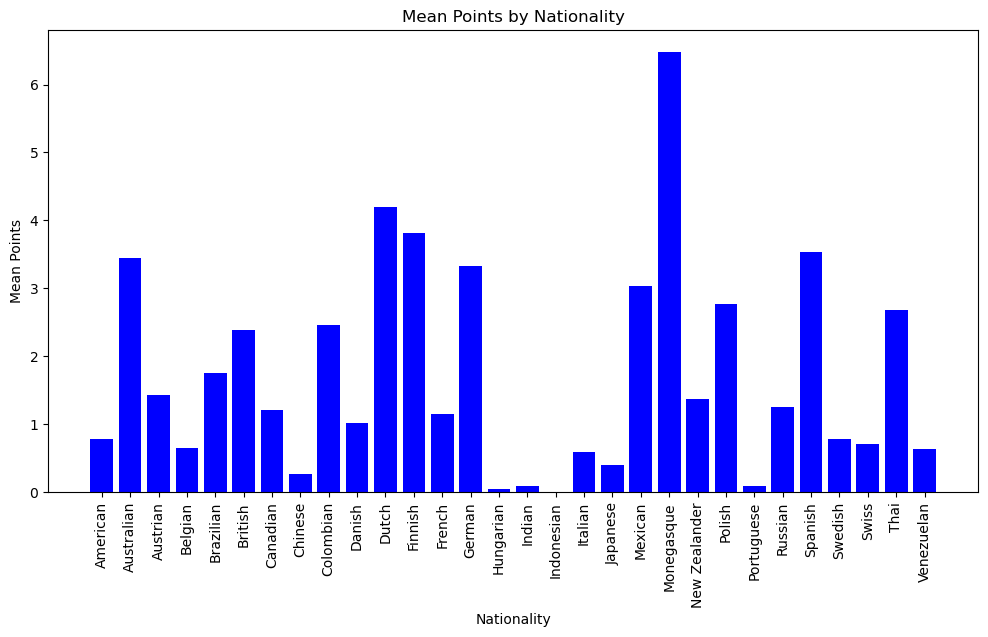

In [26]:
#Bar graph for mean points
plt.figure (figsize= (12,6))

plt.bar(x = drivers_fastest_clean["nationality"],height = drivers_fastest_clean["mean_points"], color= "blue")
plt.xlabel("Nationality")
plt.ylabel("Mean Points")
plt.title("Mean Points by Nationality")
plt.xticks(rotation=90)
plt.show

From this graph, we see the average points by nationality for all nationalities studied. We also see the range of mean points is from 0 (Indian, meaning no Indian drivers earned points in this dataset) to around 7 (Monegasque).

<function matplotlib.pyplot.show(close=None, block=None)>

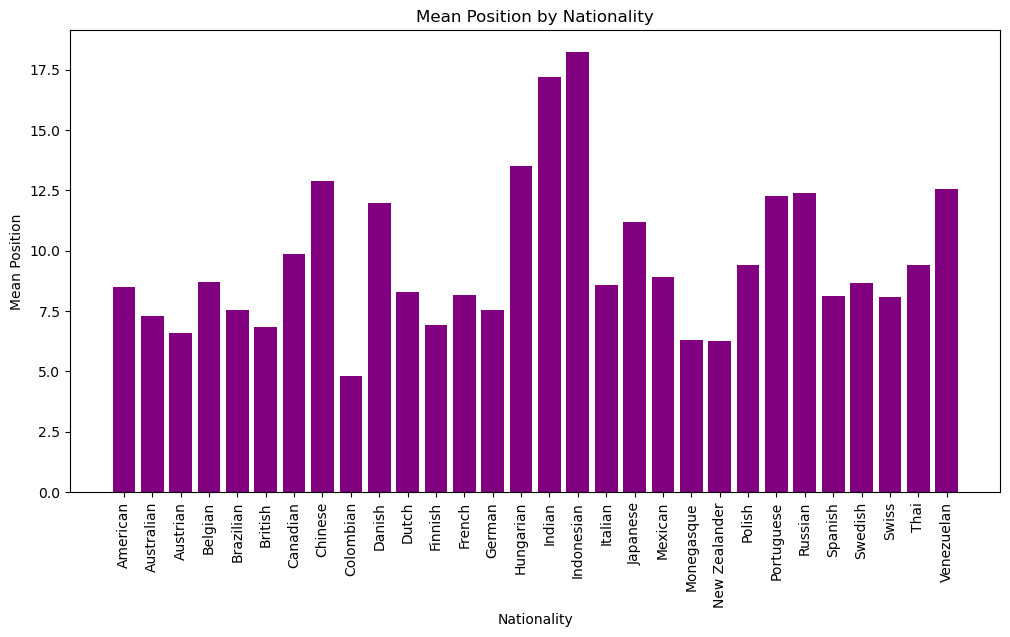

In [27]:
#Bar graph for mean position
plt.figure (figsize= (12,6))

plt.bar(x = drivers_fastest_clean["nationality"],height = drivers_fastest_clean["mean_position"], color="purple")
#plt.scatter(x=drivers_merged_clean["nationality"], y= drivers_merged_clean["position"], s=2)
plt.xlabel("Nationality")
plt.ylabel("Mean Position")
plt.title("Mean Position by Nationality")
plt.xticks(rotation=90)
plt.show

From this graph, we can see the average race position of each nationality of all the nationalities studied. We also see that the mean position ranges from around 5(Colombian) to around 17.5(Indonesian).

<function matplotlib.pyplot.show(close=None, block=None)>

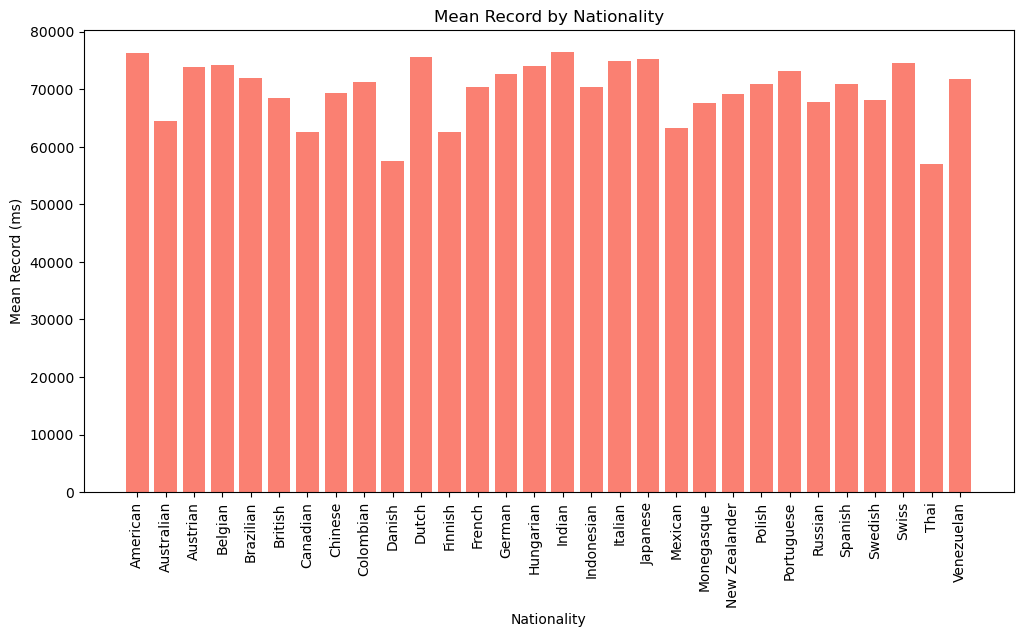

In [28]:
#Bar graph for mean record
plt.figure (figsize= (12,6))

plt.bar(x = drivers_fastest_clean["nationality"],height = drivers_fastest_clean["mean_record"], color="salmon")
plt.xlabel("Nationality")
plt.ylabel("Mean Record (ms)")
plt.title("Mean Record by Nationality")
plt.xticks(rotation=90)
plt.show

From this graph, we see the mean lap record by nationality of all nationalities studied. We also see that the mean lap record ranges from around 58,000 ms (Thai) to around 75,000 ms (Indian). 

<font size="4"> 
<span style="color:green"> Results by Continent </span>

In [29]:
#Analysis by Continent
continent_agg.round(2)

,continent,mean_rank,mean_points,mean_position,mean_record_ms
1,Asian,13.55,0.58,11.71,72826.00
2,Australian or NZ,9.10,2.77,6.98,66096.67
3,European,10.19,1.98,7.81,70978.12
4,North American,12.84,0.89,8.93,68056.60
5,South American,10.37,1.86,7.75,70770.80


From this table, we see the mean rank, points, position, and lap record from drivers of each continent studied. 

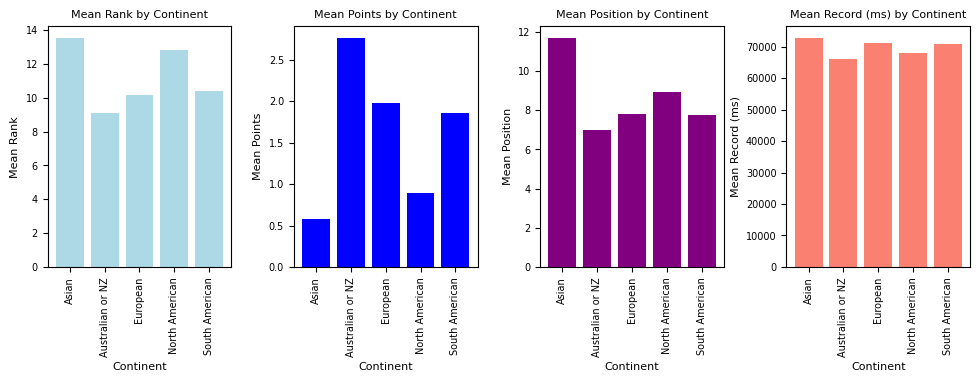

In [30]:
columns= ["mean_rank", "mean_points", "mean_position", "mean_record_ms"]
column_names=["Mean Rank", "Mean Points", "Mean Position", "Mean Record (ms)"]
color = ['lightblue', 'blue', 'purple', 'salmon']
scatter_column= ["rank", "points", "position"]

fig, list_subfig = plt.subplots(1, 4,figsize = (10,3))

plt.tight_layout()

i=0
for column in columns:
    list_subfig[i].bar(x = continent_agg["continent"], height= continent_agg[column], color=color[i])
    list_subfig[i].set_title(str(column_names[i])+ " by Continent", fontsize=8)
    list_subfig[i].set_xlabel("Continent", fontsize=8)
    list_subfig[i].set_ylabel(column_names[i], fontsize=8)
    list_subfig[i].tick_params(axis="x", rotation=90, labelsize=7)
    list_subfig[i].tick_params(axis="y", labelsize=7)
    i+=1



From these four graphs, we see the average rank, points, position, and lap record (ms) of drivers from each continent studied, and this graph format allows us to make comparisons between continents more easily than in the table format. We see that drivers from Australia or New Zealand have on average the best performance, as they have they tend to have the lowest rank, position, and record and the most points earned. We also see that drivers from Asia tend to have the worst performance, as they tend to have the highest rank, position, and record and the fewest points earned.

<font size="5"> 

<span style="color:darkblue"> Discussion </span>

<font size="3">For our data analysis, we found the top 5 nationalities with either the best average ranking (Colombian, Monegasque, Finnish, Australian, and Spanish), highest average points (Monegasque, Dutch, Finnish, Spanish, Australian), best average position (Colombian, New Zealander, Monegasque, Austrian, British), and fastest mean record (Thai, Danish, Canadian, Finnish, Mexican). While this data suggests drivers from these nationalities would be useful points of study to determine what factors influence their success, since Monegasque, Australian, Colombian, Finnish, and Spanish nationalities are all found more than once in these tables, it may be more beneficial to prioritize studying the factors that influence drivers of these nationalities first. Additionally, in our study of continent of origin, we found that drivers from Australia and New Zealand tend to have the best performance, as the graphs above demonstrate these drivers have on average the best rank, highest points earned, best position, and best record lap times. This data, along with the nationalities data that affirms the strong performance of drivers from both Australia and New Zealand, demonstrates that while we have identified many nationalities for future study, studying drivers from Australia and New Zealand should be prioritized. However, it is important to note that we did not have ranking, points, position, and record data for all drivers and all nationalities, meaning that we were not able to account for every driver's nationality that is represented in F1 races. Future analysis should also consider F1 datasets that do contain this information to close this knowledge gap. 

<font size="5"> 

<span style="color:darkblue"> Citations </span>

1. https://www.formula1.com/en/page.what-is-f1.html
2. https://pandas.pydata.org/docs/reference/api/pandas.concat.html